In [1]:
#!pip install xlrd --upgrade

In [2]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl
from sklearn.model_selection import train_test_split

In [4]:
#sig_data = pd.read_excel("/Users/travis/School_Funding_Assistant_Project/Data/sig_database - Capstone.xls")
sig_data = pd.read_excel("/Users/travis/School_Funding_Assistant_Project/Data/sig_database - Capstone.xls")

In [5]:
sig_data.columns

Index(['ncessch', 'leaid', 'state', 'leanm', 'schnam', 'lea_name',
       'school_name', 'sig_eligible', 'sig_awarded', 'tier', 'ccd0809',
       'missing_ccd_flag', 'missing_school_flag', 'grad_rate_identified',
       'sig_model', 'y1_sig_award', 'total_sig_award',
       'total_sig_award_per_pupil', 'annual_sig_award_per_pupil',
       'totalexp_per_pupil', 'sig_per_pupil_increase', 'level08', 'gslo08',
       'gshi08', 'type08', 'chartr08', 'magnet08', 'titlei08', 'ulocal08',
       'urban0809', 'ccdpercentfrl0809', 'poverty_ccd0809', 'totfrl08',
       'ccdpercentminority0809', 'minority_ccd0809', 'am08', 'asian08',
       'black08', 'hisp08', 'pacific08', 'white08', 'toteth08',
       'percentell0809', 'ell08', 'percentswd0809', 'swd08', 'sizeall0809',
       'sizeelem0809', 'sizemiddle0809', 'sizehigh0809', 'member08',
       'ilevel08', 'imagnet08', 'ititlei08', 'itotfrl08', 'iam08', 'iasian08',
       'iblack08', 'ihisp08', 'iwhite08', 'itoteth08', 'imember08'],
      dtype='o

In [6]:
# geo_data = pd.read_excel("/Users/travis/School_Funding_Assistant_Project/Data/EDGE_GEOCODE_PUBLICLEA_2021.xlsx")
geo_data = pd.read_excel("/Users/travis/School_Funding_Assistant_Project/Data/EDGE_GEOCODE_PUBLICLEA_2021.xlsx")

In [7]:
geo_data.columns

Index(['LEAID', 'NAME', 'OPSTFIPS', 'STREET', 'CITY', 'STATE', 'ZIP', 'STFIP',
       'CNTY', 'NMCNTY', 'LAT', 'LON', 'CBSA', 'NMCBSA', 'CBSATYPE', 'CSA',
       'NMCSA', 'NECTA', 'NMNECTA', 'CD', 'SLDL', 'SLDU', 'SCHOOLYEAR',
       'LOCALE', 'PCT_CITY11', 'PCT_CITY12', 'PCT_CITY13', 'PCT_SUB21',
       'PCT_SUB22', 'PCT_SUB23', 'PCT_TOWN31', 'PCT_TOWN32', 'PCT_TOWN33',
       'PCT_RURAL41', 'PCT_RURAL42', 'PCT_RURAL43'],
      dtype='object')

In [8]:
sig_data2 = sig_data.join(geo_data.set_index('LEAID'), on='leaid')

In [9]:
sig_data2.columns

Index(['ncessch', 'leaid', 'state', 'leanm', 'schnam', 'lea_name',
       'school_name', 'sig_eligible', 'sig_awarded', 'tier', 'ccd0809',
       'missing_ccd_flag', 'missing_school_flag', 'grad_rate_identified',
       'sig_model', 'y1_sig_award', 'total_sig_award',
       'total_sig_award_per_pupil', 'annual_sig_award_per_pupil',
       'totalexp_per_pupil', 'sig_per_pupil_increase', 'level08', 'gslo08',
       'gshi08', 'type08', 'chartr08', 'magnet08', 'titlei08', 'ulocal08',
       'urban0809', 'ccdpercentfrl0809', 'poverty_ccd0809', 'totfrl08',
       'ccdpercentminority0809', 'minority_ccd0809', 'am08', 'asian08',
       'black08', 'hisp08', 'pacific08', 'white08', 'toteth08',
       'percentell0809', 'ell08', 'percentswd0809', 'swd08', 'sizeall0809',
       'sizeelem0809', 'sizemiddle0809', 'sizehigh0809', 'member08',
       'ilevel08', 'imagnet08', 'ititlei08', 'itotfrl08', 'iam08', 'iasian08',
       'iblack08', 'ihisp08', 'iwhite08', 'itoteth08', 'imember08', 'NAME',
       

In [10]:
pd.options.display.max_columns = None

In [11]:
sig_data2.sample(5)

,ncessch,leaid,state,leanm,schnam,lea_name,school_name,sig_eligible,sig_awarded,tier,ccd0809,missing_ccd_flag,missing_school_flag,grad_rate_identified,sig_model,y1_sig_award,total_sig_award,total_sig_award_per_pupil,annual_sig_award_per_pupil,totalexp_per_pupil,sig_per_pupil_increase,level08,gslo08,gshi08,type08,chartr08,magnet08,titlei08,ulocal08,urban0809,ccdpercentfrl0809,poverty_ccd0809,totfrl08,ccdpercentminority0809,minority_ccd0809,am08,asian08,black08,hisp08,pacific08,white08,toteth08,percentell0809,ell08,percentswd0809,swd08,sizeall0809,sizeelem0809,sizemiddle0809,sizehigh0809,member08,ilevel08,imagnet08,ititlei08,itotfrl08,iam08,iasian08,iblack08,ihisp08,iwhite08,itoteth08,imember08,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,LAT,LON,CBSA,NMCBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,LOCALE,PCT_CITY11,PCT_CITY12,PCT_CITY13,PCT_SUB21,PCT_SUB22,PCT_SUB23,PCT_TOWN31,PCT_TOWN32,PCT_TOWN33,PCT_RURAL41,PCT_RURAL42,PCT_RURAL43
15024,5.306480e+11,5306480,WA,Othello School District,Scootney Springs Elementary,Othello Sd,Scootney Springs Elementary,1,0,3,1,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,KG,06,1.0,-2.0,-2.0,1.0,41.0,3.0,0.804281,3.0,526.0,0.778287,3.0,4.0,6.0,3.0,496.0,-2.0,145.0,654.0,0.400612,262.0,-1.000000,-1.0,4.0,4.0,-2.0,-2.0,654.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Othello School District,53.0,1025 S 1st Ave,OTHELLO,WA,99344.0,53.0,53001.0,Adams County,46.814090,-119.173221,36830,"Othello, WA",2.0,393,"Moses Lake-Othello, WA",N,N,5304.0,53009,53009,2020-2021,32.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,87.11,0.0,12.89,0.0,0.0
15236,5.310110e+11,5310110,WA,Yakima School District,Ridgeview Elementary,Yakima School District,Ridgeview Elem,1,0,3,1,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,KG,05,1.0,-2.0,-2.0,1.0,13.0,1.0,0.907514,3.0,471.0,0.724470,2.0,15.0,7.0,10.0,344.0,-2.0,143.0,519.0,0.352601,183.0,-1.000000,-1.0,3.0,3.0,-2.0,-2.0,519.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yakima School District,53.0,104 N 4TH AVE,YAKIMA,WA,98902.0,53.0,53077.0,Yakima County,46.602220,-120.515721,49420,"Yakima, WA",1.0,N,N,N,N,5304.0,53014,53014,2020-2021,13.0,0.0,0.0,96.36,0.0,3.64,0.0,0.0,0.00,0.0,0.00,0.0,0.0
11299,3.807200e+11,3807200,ND,Ft Yates 4,Fort Yates Middle School,Fort Yates 4,Ft. Yates Middle School,1,0,3,1,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,06,08,1.0,-2.0,-2.0,1.0,43.0,3.0,0.858156,3.0,121.0,0.950355,3.0,133.0,0.0,1.0,0.0,-2.0,7.0,141.0,0.453901,64.0,0.000000,0.0,1.0,-2.0,1.0,-2.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FT YATES 4,38.0,9189 1/2 Hwy 24,Fort Yates,ND,58538.0,38.0,38085.0,Sioux County,46.092553,-100.677635,N,N,0.0,N,N,N,N,3800.0,38031,38031,2020-2021,43.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,100.0
9105,2.918480e+11,2918480,MO,Lexington R-V,Lexington Middle,Lexington R-V,Lexington Middle,1,0,3,1,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,05,08,1.0,0.0,0.0,0.0,32.0,2.0,0.472325,2.0,128.0,0.103321,1.0,0.0,3.0,14.0,11.0,-2.0,243.0,271.0,-1.000000,-1.0,-1.000000,-1.0,2.0,-2.0,1.0,-2.0,271.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LEXINGTON R-V,29.0,2323A HIGH SCHOOL DRIVE,LEXINGTON,MO,64067.0,29.0,29107.0,Lafayette County,39.173695,-93.865563,28140,"Kansas City, MO-KS",1.0,312,"Kansas City-Overland Park-Kansas City, MO-KS",N,N,2905.0,29053,29021,2020-2021,32.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,100.00,0.0,0.00,0.0,0.0
12124,3.910025e+11,3910025,OH,Kenton City,Espy Elementary School,Kenton City,Espy Elementary School,1,0,3,1,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,KG,05,1.0,0.0,-2.0,1.0,32.0,2.0,0.753968,3.0,190.0,0.020408,1.0,2.0,0.0,0.0,3.0,-2.0,240.0,245.0,-1.000000,-1.0,0.198413,50.0,2.0,2.0,-2.0,-2.0,252.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kenton City,39.0,222 W Carrol St,Kenton,OH,43326.0,39.0,39065.0,Hardin County,40.649460,-83.610081,N,N,0.0,N,N,N,N,3905.0,39083,39001,2020-2021,32.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,100.00,0.0,0.00,0.0,0.0


In [12]:
# Collection of label lists for each type of grouping to be used in graphs
label_list = ['City, large','City, midsize','City, smallSuburb', 'Suburb, Large','Suburb, midsize','Suburb, small','Town, fringe','Town, distant','Town, remote','Rural, fringe', 'Rural, distant','Rural, remote']
school_list = ['Elementary School','Middle School','High School','Non-Standard']
poverty_list = ['0<35 Percent Poverty','35<75 Percent Poverty', '>75 Percent Poverty']

# Grouping by State, we are looking at which states recieved SIG Awards vs The amount of eligible
sig_award_df = pd.DataFrame(sig_data2.groupby(['STATE'], sort=True)['sig_awarded'].sum()).reset_index()
sig_eligible_df = pd.DataFrame(sig_data2.groupby(['STATE'], sort=True)['sig_eligible'].sum()).reset_index()

# Grouping by Urban Type, we are looking at which urban types recieved SIG Awards vs The amount of eligible
urban_eligible_df = pd.DataFrame(sig_data2.groupby(['ulocal08'], sort=True)['sig_eligible'].sum()).reset_index()
urban_awarded_df = pd.DataFrame(sig_data2.groupby(['ulocal08'], sort=True)['sig_awarded'].sum()).reset_index()
urban_awarded_df.drop(index=urban_awarded_df.index[:2], axis=0, inplace=True)
urban_awarded_df['label'] = label_list
urban_eligible_df.drop(index=urban_eligible_df.index[:2], axis=0, inplace=True)
urban_eligible_df['label'] = label_list

# Grouping by School Level, we are looking at which level of schools recieved SIG Awards vs The amount of eligible
level_eligible_df = pd.DataFrame(sig_data2.groupby(['level08'], sort=True)['sig_eligible'].sum()).reset_index()
level_eligible_df['label'] = school_list
level_awarded_df = pd.DataFrame(sig_data2.groupby(['level08'], sort=True)['sig_awarded'].sum()).reset_index()
level_awarded_df['label'] = school_list

# Grouping by Poverty Level, we are looking at which level of poverty recieved SIG Awards vs The amount of eligible
poverty_eligible_df = pd.DataFrame(sig_data2.groupby(['poverty_ccd0809'], sort=True)['sig_eligible'].sum()).reset_index()
poverty_eligible_df.drop(index=poverty_eligible_df.index[:1], axis=0, inplace=True)
poverty_eligible_df['label'] = poverty_list
poverty_awarded_df = pd.DataFrame(sig_data2.groupby(['poverty_ccd0809'], sort=True)['sig_awarded'].sum()).reset_index()
poverty_awarded_df.drop(index=poverty_awarded_df.index[:1], axis=0, inplace=True)
poverty_awarded_df['label'] = poverty_list

In [13]:
poverty_eligible_df

,poverty_ccd0809,sig_eligible,label
1,1.0,1341,0<35 Percent Poverty
2,2.0,6492,35<75 Percent Poverty
3,3.0,7407,>75 Percent Poverty


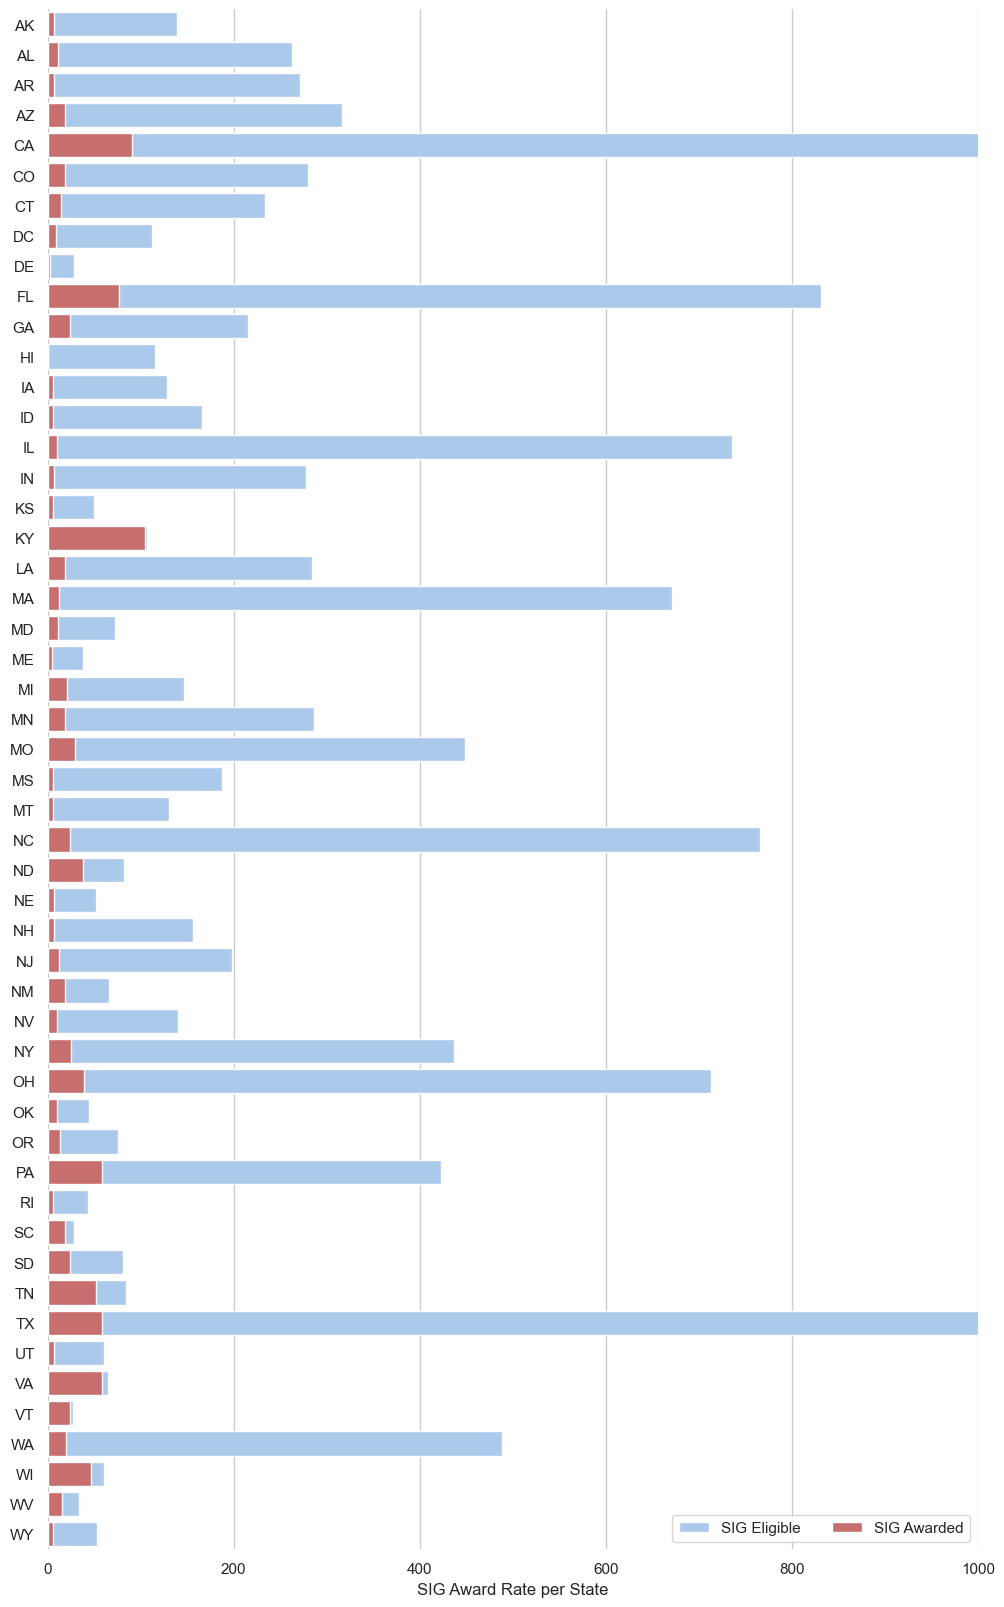

In [14]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 20))

# Plot the total applications
sns.set_color_codes("pastel")
sns.barplot(x="sig_eligible", y='STATE', data=sig_eligible_df,
            label="SIG Eligible", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="sig_awarded", y="STATE", data=sig_award_df,
            label="SIG Awarded", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1000), ylabel="",
       xlabel="SIG Award Rate per State")
sns.despine(left=True, bottom=True)


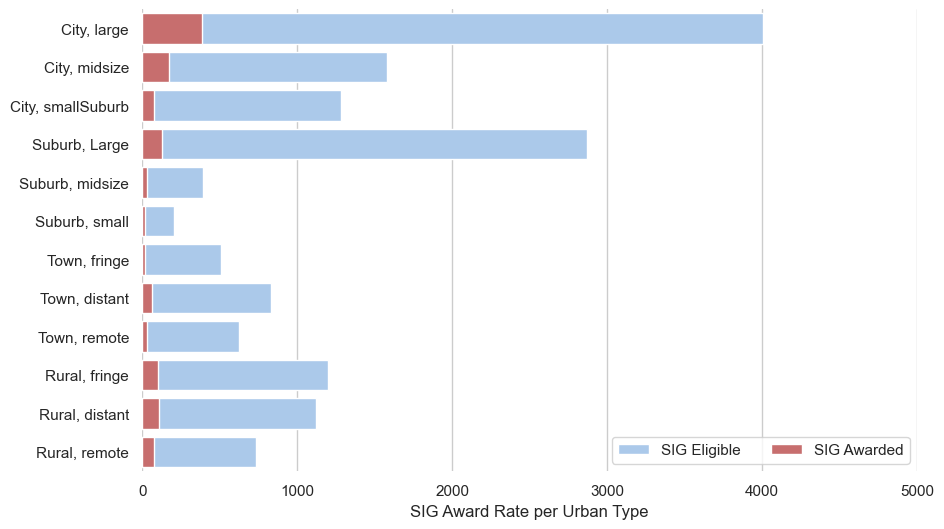

In [15]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 6))

# Plot the total applications
sns.set_color_codes("pastel")
sns.barplot(x="sig_eligible", y='label', data=urban_eligible_df,
            label="SIG Eligible", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="sig_awarded", y="label", data=urban_awarded_df,
            label="SIG Awarded", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 5000), ylabel="",
       xlabel="SIG Award Rate per Urban Type")
sns.despine(left=True, bottom=True)


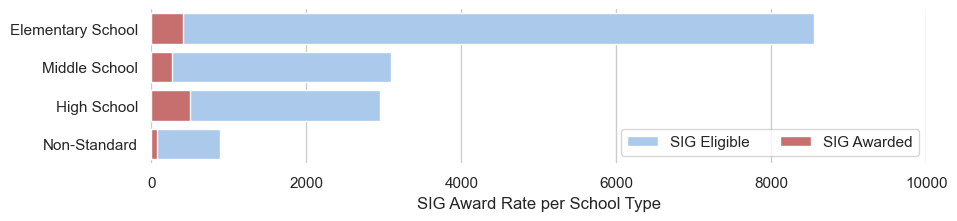

In [16]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 2))

# Plot the total applications
sns.set_color_codes("pastel")
sns.barplot(x="sig_eligible", y='label', data=level_eligible_df,
            label="SIG Eligible", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="sig_awarded", y="label", data=level_awarded_df,
            label="SIG Awarded", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10000), ylabel="",
       xlabel="SIG Award Rate per School Type")
sns.despine(left=True, bottom=True)


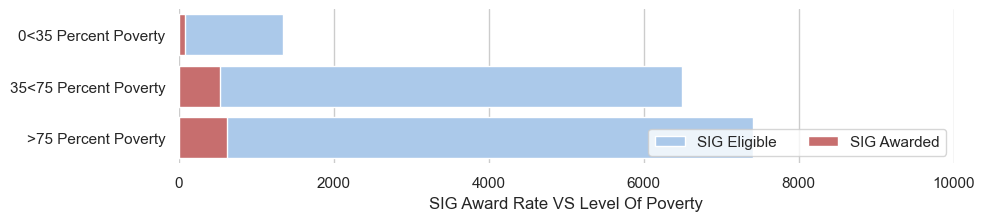

In [17]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 2))

# Plot the total applications
sns.set_color_codes("pastel")
sns.barplot(x="sig_eligible", y='label', data=poverty_eligible_df,
            label="SIG Eligible", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="sig_awarded", y="label", data=poverty_awarded_df,
            label="SIG Awarded", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10000), ylabel="",
       xlabel="SIG Award Rate VS Level Of Poverty")
sns.despine(left=True, bottom=True)


In [18]:
sig_data2.duplicated().sum()

0

In [19]:
sig_data2.isnull().sum()

ncessch         12
leaid            0
state            0
leanm            0
schnam          12
              ... 
PCT_TOWN32     545
PCT_TOWN33     545
PCT_RURAL41    545
PCT_RURAL42    545
PCT_RURAL43    545
Length: 97, dtype: int64

In [20]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = sig_data2.select_dtypes(include=numerics)
newdf.columns

Index(['ncessch', 'leaid', 'sig_eligible', 'sig_awarded', 'tier', 'ccd0809',
       'missing_ccd_flag', 'missing_school_flag', 'grad_rate_identified',
       'sig_model', 'y1_sig_award', 'total_sig_award',
       'total_sig_award_per_pupil', 'annual_sig_award_per_pupil',
       'totalexp_per_pupil', 'sig_per_pupil_increase', 'level08', 'type08',
       'chartr08', 'magnet08', 'titlei08', 'ulocal08', 'urban0809',
       'ccdpercentfrl0809', 'poverty_ccd0809', 'totfrl08',
       'ccdpercentminority0809', 'minority_ccd0809', 'am08', 'asian08',
       'black08', 'hisp08', 'pacific08', 'white08', 'toteth08',
       'percentell0809', 'ell08', 'percentswd0809', 'swd08', 'sizeall0809',
       'sizeelem0809', 'sizemiddle0809', 'sizehigh0809', 'member08',
       'ilevel08', 'imagnet08', 'ititlei08', 'itotfrl08', 'iam08', 'iasian08',
       'iblack08', 'ihisp08', 'iwhite08', 'itoteth08', 'imember08', 'OPSTFIPS',
       'ZIP', 'STFIP', 'CNTY', 'LAT', 'LON', 'CBSATYPE', 'CD', 'LOCALE',
       'PCT_

In [21]:
for name in newdf.columns:
    sig_data2[name].fillna(sig_data2[name].mean(), inplace=True)

In [22]:
objectTypes = ['object']
new1_df = sig_data2.select_dtypes(include=objectTypes)
new1_df.columns

Index(['state', 'leanm', 'schnam', 'lea_name', 'school_name', 'gslo08',
       'gshi08', 'NAME', 'STREET', 'CITY', 'STATE', 'NMCNTY', 'CBSA', 'NMCBSA',
       'CSA', 'NMCSA', 'NECTA', 'NMNECTA', 'SLDL', 'SLDU', 'SCHOOLYEAR'],
      dtype='object')

In [23]:
for name in new1_df.columns:
    sig_data2 = sig_data2.dropna(axis=0, subset=[name])

In [24]:
sig_data2.isnull().sum()

ncessch        0
leaid          0
state          0
leanm          0
schnam         0
              ..
PCT_TOWN32     0
PCT_TOWN33     0
PCT_RURAL41    0
PCT_RURAL42    0
PCT_RURAL43    0
Length: 97, dtype: int64

In [25]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# Create correlation matrix
corr_matrix = sig_data2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
sig_data2.drop(to_drop, axis=1, inplace=True)

/var/folders/b8/vk4tk9097xl4tybd4l5hl7n80000gn/T/ipykernel_99523/1793488460.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = sig_data2.corr().abs()


In [26]:
 sig_data2 = sig_data2.drop(columns=['sig_eligible', 'ncessch', 'ccd0809', 'missing_ccd_flag', 'missing_school_flag'])

In [27]:
#!pip install jinja2 --upgrade

In [28]:
warnings.filterwarnings("ignore", category=RuntimeWarning) 
corr = sig_data2.corr()
corr.style.background_gradient(cmap='coolwarm')

/var/folders/b8/vk4tk9097xl4tybd4l5hl7n80000gn/T/ipykernel_99523/549680526.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sig_data2.corr()


,sig_awarded,tier,grad_rate_identified,sig_model,y1_sig_award,total_sig_award,total_sig_award_per_pupil,totalexp_per_pupil,sig_per_pupil_increase,level08,type08,chartr08,magnet08,titlei08,ulocal08,urban0809,ccdpercentfrl0809,poverty_ccd0809,totfrl08,ccdpercentminority0809,am08,asian08,black08,hisp08,pacific08,white08,toteth08,percentell0809,ell08,percentswd0809,swd08,sizeall0809,sizeelem0809,sizemiddle0809,sizehigh0809,ilevel08,imagnet08,ititlei08,itotfrl08,iam08,iasian08,iblack08,ZIP,LAT,LON,CBSATYPE,LOCALE,PCT_CITY11,PCT_CITY12,PCT_CITY13,PCT_SUB21,PCT_SUB22,PCT_SUB23,PCT_TOWN31,PCT_TOWN32,PCT_TOWN33,PCT_RURAL41,PCT_RURAL42,PCT_RURAL43
sig_awarded,1.000000,-0.480750,0.111751,-0.004623,0.022326,0.008178,-0.004201,0.018606,-0.016899,0.130364,-0.001374,-0.128132,0.028672,-0.046018,-0.025622,-0.034673,0.033133,0.035023,0.050137,0.021371,0.035143,-0.033882,0.154817,-0.041066,-0.035064,0.023351,0.045532,-0.073454,-0.057341,-0.027329,0.075588,0.016203,-0.140867,0.010626,0.169665,0.019918,-0.041558,0.012878,0.010391,0.021711,0.018321,0.015574,-0.095310,0.043489,0.095351,-0.035758,-0.013356,0.042904,0.036134,-0.004973,-0.066317,-0.004297,-0.017290,-0.032890,-0.001774,-0.030105,-0.004372,0.024702,0.026850
tier,-0.480750,1.000000,-0.360092,0.262977,-0.228106,-0.170381,-0.076789,-0.087979,-0.009968,-0.228852,-0.092324,-0.011369,-0.064334,0.098106,0.053490,0.049073,-0.051947,-0.068577,-0.057249,-0.139449,-0.043148,0.023368,-0.192110,0.016174,0.026065,0.099810,-0.028208,0.050773,0.028137,-0.038629,-0.107888,0.047801,0.194203,0.040699,-0.233953,-0.059443,-0.015281,-0.036281,-0.032111,-0.053547,-0.046999,-0.050076,0.093855,-0.065671,-0.072758,0.017774,0.052647,-0.069049,-0.057323,-0.005939,0.063618,0.010459,0.030931,0.042848,0.036245,0.018825,0.040963,-0.004873,-0.025694
grad_rate_identified,0.111751,-0.360092,1.000000,-0.039576,0.070271,0.104384,0.082032,0.076550,0.096203,0.215169,0.246977,0.183833,0.046354,-0.113207,0.069128,0.182229,-0.073207,-0.063675,0.017376,-0.025118,-0.184407,0.003231,0.090990,0.009471,-0.023194,0.005134,0.032808,0.030240,-0.018775,0.168226,0.108734,-0.023914,-0.150465,-0.055836,0.224207,0.009284,0.030618,-0.001270,0.005195,0.010060,0.008595,0.007413,-0.036142,0.020115,0.049432,-0.003467,-0.109950,0.071736,0.027017,0.012483,-0.004927,-0.002706,-0.005862,-0.004356,-0.007317,0.008927,-0.019427,-0.030329,-0.121409
sig_model,-0.004623,0.262977,-0.039576,1.000000,-0.367643,-0.290204,-0.135590,-0.170057,-0.026342,-0.010745,-0.011615,-0.110608,-0.045407,0.020494,0.083922,0.067593,-0.041683,-0.043996,-0.029537,-0.111477,0.021550,-0.000774,-0.074141,-0.023273,-0.038307,0.096398,-0.006422,-0.018691,-0.032541,-0.005279,-0.029028,-0.009898,0.006677,0.001060,-0.012730,0.003629,-0.030583,-0.005805,0.002784,0.003802,0.003478,0.003227,-0.009831,0.009797,0.016102,-0.021187,0.079894,-0.055087,-0.038661,0.021935,-0.028648,0.003471,0.015458,0.003176,0.029456,0.021028,0.055055,0.039282,0.035874
y1_sig_award,0.022326,-0.228106,0.070271,-0.367643,1.000000,0.648279,0.142151,0.119235,0.076149,0.048540,-0.020008,0.106988,0.064526,-0.049922,-0.053620,-0.031270,0.047764,0.044590,0.132260,0.098128,-0.018881,0.035741,0.111206,0.092625,0.072945,-0.052919,0.103761,0.053731,0.112494,0.057836,0.100193,0.080889,-0.031916,-0.000249,0.084764,-0.001829,-0.003811,-0.019021,-0.001498,-0.001900,-0.001768,-0.001668,0.033325,-0.009098,-0.045528,0.019715,-0.071415,0.034849,0.043823,-0.011463,0.027402,-0.009845,-0.014755,-0.001340,-0.017971,-0.008852,-0.039265,-0.039830,-0.043147
total_sig_award,0.008178,-0.170381,0.104384,-0.290204,0.648279,1.000000,0.351619,0.085407,0.511876,0.043765,0.027534,0.096104,-0.016676,-0.037321,-0.050447,-0.033208,0.035503,0.036153,0.085121,0.085421,-0.017898,0.009580,0.010963,0.115805,0.079820,-0.058352,0.068639,0.071428,0.114678,0.073090,0.059732,0.046592,-0.026676,-0.004776,0.062973,0.002602,0.004520,0.005742,0.001942,0.002736,0.002486,0.002290,0.083683,-0.030439,-0.079747,0.018588,-0.062825,0.040272,0.034859,-0.014003,0.009449,

In [29]:
sig_data3 = sig_data2[['sig_awarded','tier','grad_rate_identified','level08','chartr08','black08','sizehigh0809',]]

In [30]:
#!pip install -U imbalanced-learn

In [31]:
sig_data3['sig_awarded'].value_counts()

0    12213
1     1096
Name: sig_awarded, dtype: int64

In [32]:
# 15523 total records of schools
# Checking the ratio of schools that were awarded the sig award

sig_data3['sig_awarded'].sum()/len(sig_data2)

0.08235028927793223

In [33]:
X = sig_data3.drop(columns=['sig_awarded'])
y = sig_data3['sig_awarded']  

In [34]:
print(sig_data3['sig_awarded'].sum())

1096


In [35]:
 X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=1)
print('\nTraining Set Length:', len(X_train)) 
print('\nTesting Set Length:', len(X_valid)) 
X_train.head()


Training Set Length: 10647

Testing Set Length: 2662


,tier,grad_rate_identified,level08,chartr08,black08,sizehigh0809
14256,3,0.0,2.0,0.0,1.0,-2.0
4392,3,0.0,1.0,0.0,144.0,-2.0
13926,2,0.0,3.0,0.0,0.0,1.0
3549,3,0.0,2.0,0.0,16.0,-2.0
5171,3,0.0,2.0,1.0,60.0,-2.0


In [36]:
# Randomly over sample the minority class
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X, y)

# Check the number of records after over sampling
print(sorted(Counter(y).items()))

[(0, 12213), (1, 1096)]


In [37]:
X.sample(5)

,tier,grad_rate_identified,level08,chartr08,black08,sizehigh0809
6975,3,0.0,1.0,-2.0,353.0,-2.0
546,3,0.0,3.0,0.0,4.0,1.0
2932,3,0.0,2.0,0.0,256.0,-2.0
11926,3,0.0,2.0,0.0,344.0,-2.0
7316,3,0.0,3.0,0.0,279.0,1.0


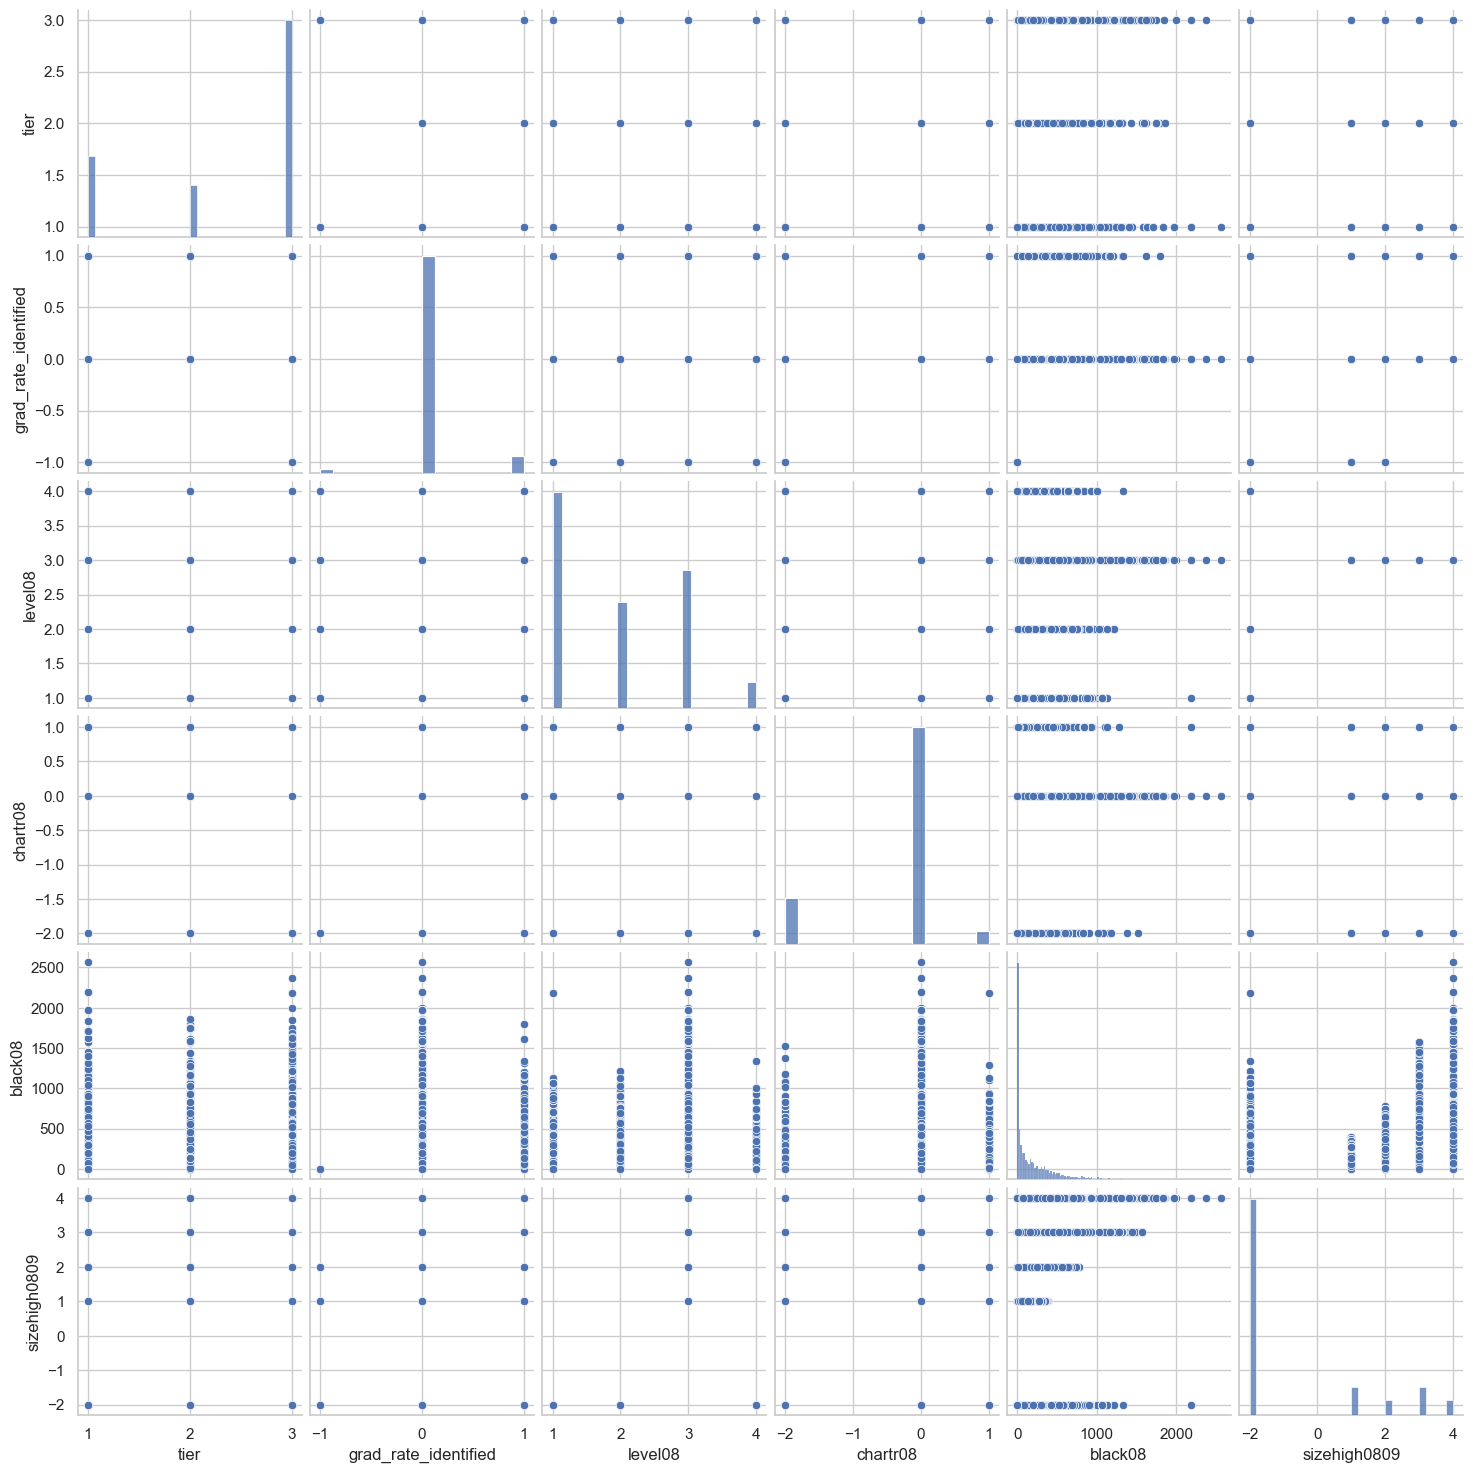

In [38]:
%matplotlib inline
sns.pairplot(data = X_train, vars=['tier','grad_rate_identified','level08','chartr08','black08','sizehigh0809'])
plt.show()

## Univariate

<AxesSubplot:xlabel='level08', ylabel='count'>

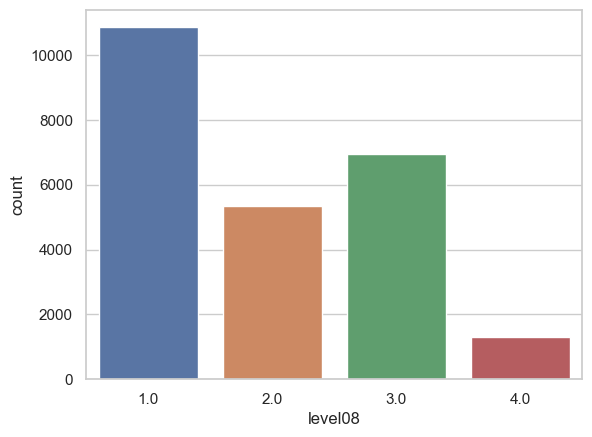

In [39]:
sns.countplot(data = X_train, x = 'level08')

<AxesSubplot:xlabel='tier', ylabel='count'>

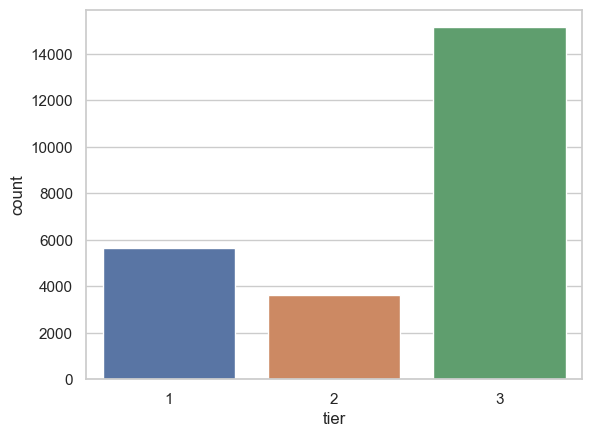

In [40]:
sns.countplot(data = X_train, x = 'tier')

<AxesSubplot:xlabel='grad_rate_identified', ylabel='count'>

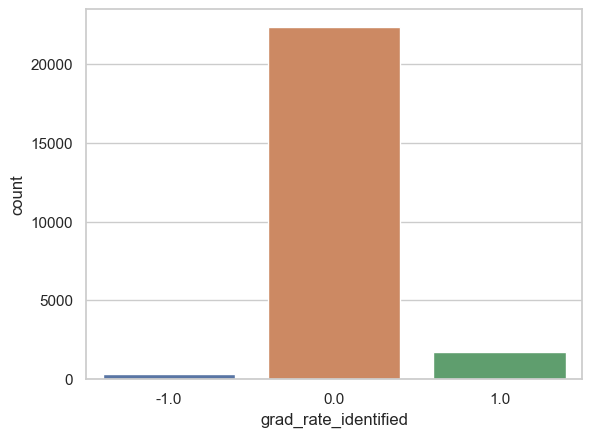

In [41]:
sns.countplot(data = X_train, x = 'grad_rate_identified')

<AxesSubplot:xlabel='chartr08', ylabel='count'>

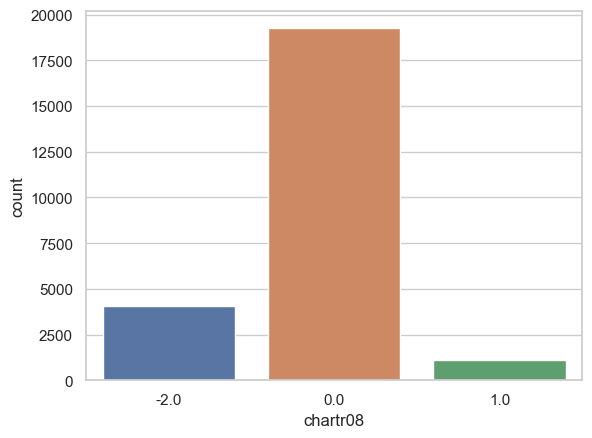

In [42]:
sns.countplot(data = X_train, x = 'chartr08')


<AxesSubplot:xlabel='sizehigh0809', ylabel='count'>

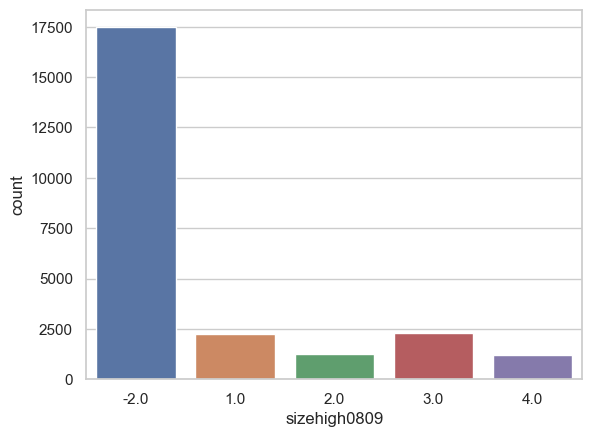

In [43]:
sns.countplot(data = X_train, x = 'sizehigh0809')

## Multivariate

<AxesSubplot:xlabel='level08', ylabel='sig_awarded'>

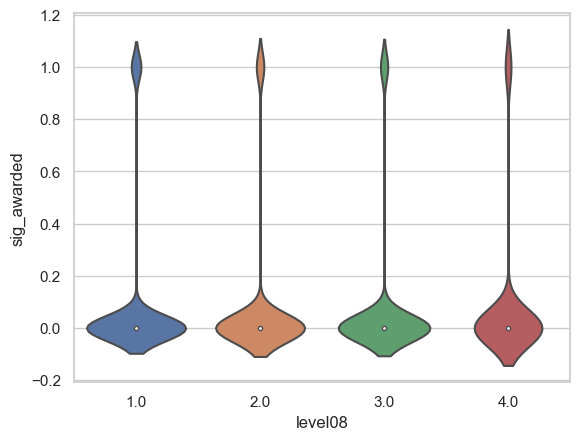

In [44]:
sns.violinplot(data = X_train, x='level08', y=y)


<AxesSubplot:xlabel='level08', ylabel='sig_awarded'>

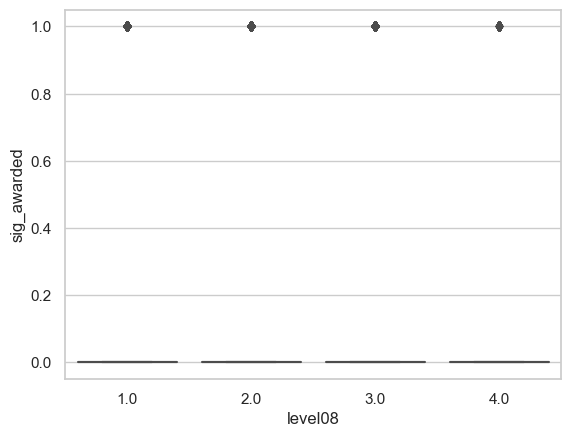

In [45]:
sns.boxplot(data = X_train, x='level08', y=y)


<AxesSubplot:xlabel='tier', ylabel='sig_awarded'>

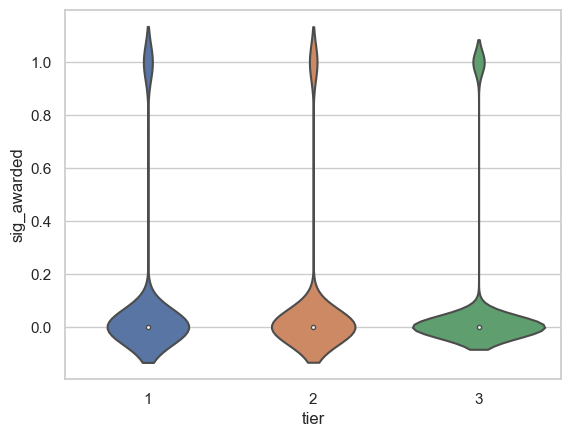

In [46]:
sns.violinplot(data = X_train, x='tier', y=y)


<AxesSubplot:xlabel='grad_rate_identified', ylabel='sig_awarded'>

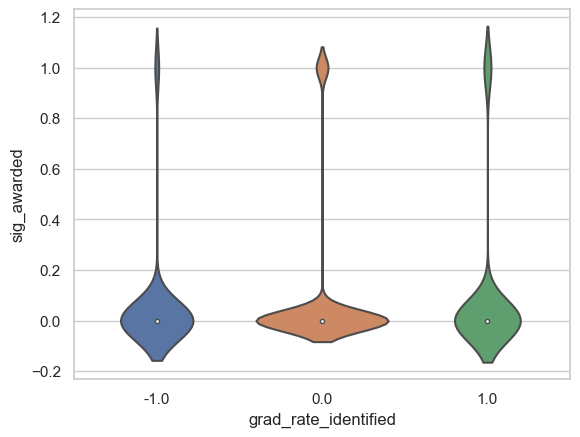

In [47]:
sns.violinplot(data = X_train, x='grad_rate_identified', y=y)

<AxesSubplot:xlabel='sizehigh0809', ylabel='sig_awarded'>

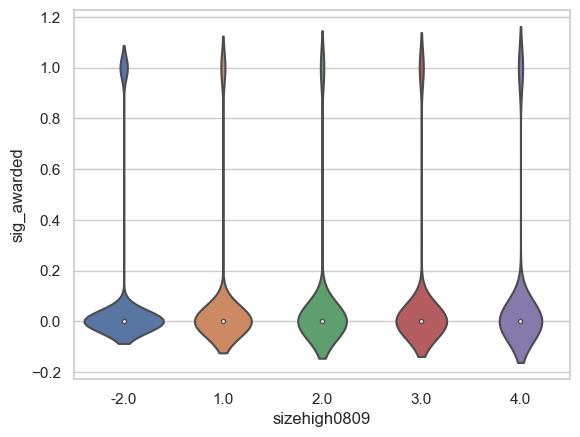

In [48]:
sns.violinplot(data = X_train, x='sizehigh0809', y=y)

In [50]:
#Storing datasets in variables to be used in Data Modeling Notebook
%store X_train 
%store y_train
%store X_valid
%store y_valid

Stored 'X_train' (DataFrame)
Stored 'y_train' (Series)
Stored 'X_valid' (DataFrame)
Stored 'y_valid' (Series)
